**CSI 4506 Introduction à l’intelligence artificielle** <br/>
*Devoir 1 : Santé des animaux de compagnie extraterrestres, préparation des données*

# Identification

Nom : Amani Louendriz <br/>

Titre: Préparation et Nettoyage des données des animaux de compagnie extraterrestres

## 1. Données

Le jeu de données pour le Devoir 1 se trouve ici :

- [github.com/turcotte/csi4106-f25/tree/main/assignments-data/a1](https://github.com/turcotte/csi4106-f25/tree/main/assignments-data/a1)

Dans votre notebook, vous pouvez accéder et lire les données directement depuis ce dépôt GitHub.

- [alien_pet_health.csv](https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv)

## 2. Tâches

1. **Charger le jeu de données**

- Lire le fichier CSV depuis l'URL GitHub fournie.
- Afficher la dimension des données (*shape*), ainsi que les cinq premières lignes.

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

'''
read_data_from_csv() transforme les données présentes dans le fichier csv vers un object pandas DataFrame
et elle retourne cet objet
'''
def read_data_from_csv() -> pd.DataFrame:
  df = pd.read_csv('https://raw.githubusercontent.com/turcotte/csi4106-f25/main/assignments-data/a1/alien_pet_health.csv')
  print(f'La dimension des données: {df.shape}')
  print(f'Les cinq premières lignes:\n {df.head()}')
  return df


In [37]:
df = read_data_from_csv()

La dimension des données: (5000, 14)
Les cinq premières lignes:
    record_id  thermoreg_reading  enzyme_activity_index  dual_lobe_signal  \
0  P22042111               52.6                   97.0               3.6   
1  P21571318               41.8                  105.0               3.4   
2  P81737259               56.2                  126.0               5.5   
3  P54935007               57.7                  106.0              -4.1   
4  P63102956               34.5                   73.0               2.3   

   stress_variability habitat_zone  activity_score  fasting_flag  \
0                -3.5           c2             2.0           0.0   
1                10.5           c1             2.0           0.0   
2                 9.6           c2             5.0           0.0   
3                -4.0           c1             4.0           0.0   
4                 0.3           c4             5.0           1.0   

   health_outcome station_code  ingest_marker calibration_tag  \
0   

2. **Valeurs manquantes**

- Examiner le jeu de données pour identifier et évaluer les valeurs manquantes dans divers attributs. Les valeurs manquantes peuvent être représentées par des symboles tels que ‘?’, des chaînes vides ou d'autres substituts.
- Lister l'attribut ou les attributs avec des valeurs manquantes.
- Décrire la méthodologie utilisée pour cette analyse, et fournir le code correspondant, le cas échéant.
- Convertir les jetons manquants (par exemple, chaînes vides, `n/a`, `?`) en `NaN`.
- Forcer les colonnes numériques ou analogues à être numériques (erreurs→`NaN`).

Après cette étape, chaque attribut sera peuplé de valeurs spécifiques ou de `NaN`.

In [38]:
'''
is_malformed_value(value) détermine si une valeur 'value' appartenant
à l'objet 'pandas.DataFrame' est valide.

retourne True si ce n'est pas valide, False dans le cas contraire.

Veuillez notez que la transformation précédente de csv vers un objet pandas.Dataframe
avait fait en sorte que les chaines vides sont déjà transformées en NaN, mais la validation
avait toutefois été ajouté pour des fins de complétude.
'''

def is_malformed_value(value) -> bool:
  return ((value == "?") or (type(value) == str and value.lower() == "n/a") or (value == ""))

'''
detect_malformed_features() détermine les attributs qui contiennent au moins une valeur invalide
retourne une liste contenant les attributs ayant au moins une valeur invalide
'''
def detect_malformed_features() -> list:
  malformed_features = [];
  for attribute in df:
    for value in df[attribute]:
      if (is_malformed_value(value)):
          malformed_features.append(attribute);
          break
  return malformed_features;

'''
print_malformed_features(malformed_attributes) prend en entrée
la liste des attributs invalides à afficher sur la sortie standard
'''

def print_malformed_features(malformed_attributes):
  print("Les attributs avec des valeurs manquantes sont: ")
  for feature in malformed_attributes:
    print(feature,end=" ")

'''
clean_malformed_features(copy_of_dataset,malformed_attributes) prend en entrée le jeu de données et la
liste des attributs contenant des valeurs invalides puis remplace chaque valeur
invalide en NaN
'''
def clean_malformed_features(copy_of_dataset,malformed_attributes):
  for feature in malformed_attributes:
    for index in copy_of_dataset.index:
      if (is_malformed_value(copy_of_dataset.loc[index,feature])):
        copy_of_dataset.loc[index,feature] = np.nan

'''
ensure_numerical_only(copy_of_dataset) prend en entrée le jeu de données et assure que les colonnes qui sont supposément numériques ou analogues le
sont vraiment, sinon une chaîne NaN est introduite. Il s'est avéré que parmi toutes les données de type
numérique ou analogue, il ne s'est jamais produite qu'un cas ne soit pas du même type, mais pour des fins de complétude
la fonction avait été ajouté.
'''

def ensure_numerical_only(copy_of_dataset):
  for index in copy_of_dataset.index:
    for feature in copy_of_dataset.columns:
      if (feature != "record_id" and feature != "habitat_zone" and feature != "station_code" and feature != "calibration_tag"):# ces attributs sont de type chaine de caractère
        if (isinstance(copy_of_dataset.loc[index,feature],(np.float64,np.int64)) == False):
          print("type problem! ",copy_of_dataset.loc[index,feature])
          copy_of_dataset.loc[index,feature] = np.nan


In [39]:
# Lister les attributs avec des valeurs manquantes
malformed_features = detect_malformed_features()
print_malformed_features(malformed_features)

# Convertir les jetons manquants (par exemple, chaînes vides, n/a, ?) en NaN
copy_of_dataset = df.copy() # pour éviter de changer l'original
clean_malformed_features(copy_of_dataset,malformed_features);

# Forcer les colonnes numériques ou analogues à être numériques (erreurs→NaN).
ensure_numerical_only(copy_of_dataset)

Les attributs avec des valeurs manquantes sont: 
record_id habitat_zone station_code calibration_tag 

Réponse: <br/>
<b>Méthodologie pour trouver les attributs avec des valeurs manquantes</b>:

Comme le montre la double boucle en haut dans la fonction `detect_malformed_features()`, on voit les données comme un ensemble de colonnes, on sélectionne à tour de rôle chaque attribut, puis on traverse toutes les valeurs de l'attribut en question.

Si une des valeurs est manquante (présence d'un symbole ?, n/a),alors on affiche la valeur de l'attribut en question et on passe à la
colonne suivante.

Notez bien que le fait de transformer les données csv en objet pandas DataFrame, a automatiquement transformé les valeurs
avec des chaînes vides en NaN, la vérification (`value == ""`) n'est en fait à priori jamais atteinte, mais avait été ajouté pour des fins de
complétude.

3. **Attributs catégoriels**

- Analyser le jeu de données pour détecter d'éventuels problèmes avec les attributs catégoriels. Par exemple, vous pourriez rencontrer des cas où la même catégorie est représentée de manière incohérente en utilisant à la fois des lettres minuscules et majuscules, ou où des espaces superflus sont inclus.
- Décrire la méthodologie utilisée pour cette analyse, et fournir le code correspondant, le cas échéant.
- Normaliser les valeurs des attributs catégoriels.

In [40]:
'''
detect_categorical_anomalies(copy_of_dataset,categorical_features) prend en entrée le jeu de données et les attributs catégoriels présents
puis détermine les valeurs qui ne sont pas normalisées.
'''

def detect_categorical_anomalies(copy_of_dataset,categorical_features):
  for feature in categorical_features:
    normalized_categories = []
    unique_non_na_feature_list = copy_of_dataset[feature].dropna().unique()
    for tag in unique_non_na_feature_list:
      if (tag != tag.strip()):
        print("The tag that have whitespace is:",tag,".")
      if ((tag.lower() in normalized_categories) == False):
        normalized_categories.append(tag.lower())
      elif((tag.lower() in normalized_categories) == True):
        print(f"Scanning:{tag}, that was already found as:{tag.lower()}.")

'''
normalize_categorical_anomalies(copy_of_dataset,categorical_features) prend en
entrée le jeu de données, puis transforme toutes les valeurs en miniscule
et enlève d'éventuels espaces
'''
def normalize_categorical_anomalies(copy_of_dataset,categorical_features):
  for feature in categorical_features:
    for index in copy_of_dataset[feature].index:
      if (pd.isnull(copy_of_dataset.loc[index,feature]) == False):#NaN est considéré un float et on ne peut pas appeller lower() et strip()
        copy_of_dataset.loc[index,feature] = copy_of_dataset.loc[index,feature].lower()
        copy_of_dataset.loc[index,feature] = copy_of_dataset.loc[index,feature].strip()

In [41]:
# Cette cellule peut prendre jusqu'à 15 secondes

# Décrire la méthodologie utilisée pour l'analyse catégorielle, et fournir le code correspondant, le cas échéant.
print("Avant la normalisation des valeurs catégoriels")
print("******************************************")
print(pd.Series(copy_of_dataset["calibration_tag"]).value_counts())
print('\t')
print(pd.Series(copy_of_dataset["habitat_zone"]).value_counts())
print('\t')
print(pd.Series(copy_of_dataset["station_code"]).value_counts())
print('\t')
print("******************************************")
# On peut voir de ce qui précéde que les valeurs de calibration_tag et habitat_zone sont mélangées entre
# miniscules et majuscules. (si vous réexécutez cette cellule uniquement, vous ne verrez pas cette subtilité
# vu que copy_of_dataset aurait déjà été nettoyé, il vaut mieux d'exécuter le projet en entier.)
# Il n'est pas clair si l'attribut station_code a un probleme similaire, donc
# la fonction suivante detect_categorical_anomalies(categorical_features) avait été implémentée pour vérifier les "duplicats"
#  (des valeurs supposément "uniques" qui se trouvent dupliquées) pour les trois attributs catégoriels présents
categorical_features = ["calibration_tag","habitat_zone","station_code"]
detect_categorical_anomalies(copy_of_dataset,categorical_features)

# La fonction précédente avait permis de déterminer que l'attribut: station_code a également le problème
# des valeurs non normalisées, par exemple: Scanning:Z-IET, that was already found as:z-iet, ou encore:
# Scanning:Z-qci, that was already found as:z-qci .
# La raison pour laquelle des sorties similaires à ceci sont présentes: Scanning:a, that was already found as:a;
# c'est parce que j'ai décidé de normaliser les valeurs en les transformant tous en miniscule. La première fois que
# la fonction avait sélectionné une valeur de cet attribut, c'était probablement un "A", la valeur de la liste
# des catégories uniques (normalized_categories) ne contenait pas le "a", alors on a pris cette valeur comme un "a" puis on l'a ajouté.
# La deuxième fois que l'on a sélectionné une valeur "a", la liste "normalized_categories" la contenait déjà, donc on avait imprimé que
# le tag "a" avait déjà été trouvé comme un "a". Aucune valeur ne contenanit des espaces.

# Normaliser les valeurs des attributs catégoriels.

normalize_categorical_anomalies(copy_of_dataset,categorical_features)

print("Après la normalisation des valeurs catégoriels")
print(pd.Series(copy_of_dataset["calibration_tag"]).value_counts())
print('\t')
print(pd.Series(copy_of_dataset["habitat_zone"]).value_counts())
print('\t')
print(pd.Series(copy_of_dataset["station_code"]).value_counts())
print('\t')


Avant la normalisation des valeurs catégoriels
******************************************
calibration_tag
A    4461
a     204
B      90
b      10
Name: count, dtype: int64
	
habitat_zone
c1    1475
c2    1072
c3     885
c4     492
c5     348
C1     170
C2     118
C3      89
C4      57
C5      37
Name: count, dtype: int64
	
station_code
Z-QXD    4
Z-PGV    3
Z-HHL    3
Z-UJL    3
Z-CRD    3
        ..
Z-DEZ    1
Z-RFW    1
Z-BAS    1
Z-ALX    1
Z-ubk    1
Name: count, Length: 4272, dtype: int64
	
******************************************
Scanning:a, that was already found as:a.
Scanning:b, that was already found as:b.
Scanning:C4, that was already found as:c4.
Scanning:C5, that was already found as:c5.
Scanning:C1, that was already found as:c1.
Scanning:C2, that was already found as:c2.
Scanning:C3, that was already found as:c3.
Scanning:z-xcm, that was already found as:z-xcm.
Scanning:Z-AGG, that was already found as:z-agg.
Scanning:Z-SPS, that was already found as:z-sps.
Scanning:z-d

4. **Supprimer les attributs non informatifs**

- Éliminer les types d’attributs suivants du jeu de données, le cas échéant :
  - Identifiants uniques (ID)
  - Caractéristiques constantes et quasi-constantes
  - Quasi-identifiants à haute cardinalité
  - Duplicatas linéaires mis à l'échelle
- Fournir la liste des attributs spécifiques supprimés.
- Pour chaque attribut listé, offrir une brève justification de son exclusion.

**Réponse:**

La liste des attributs à supprimer est: record_id, ingest_marker, calibration_tag, station_code, diagnostic_noise. (La justification suit)


In [42]:
new_copy_dataset = copy_of_dataset.copy()

# Identifiants uniques (ID)
# On va éliminer le record_id parce qu'il est juste pour identifier chaque échantillon, il n'y a pas de relation d'ordre
# entre les échantillons, donc il n'est pas nécessaire de conserver cette colonne d'identification, cela va
# améliorer le temps et la qualité de l'entrainement du modèle par la suite.
try:
  new_copy_dataset = new_copy_dataset.drop(columns='record_id')
except:
  print("record_id was already removed")

# Caractéristiques constantes
# On peut voir que ingest_marker est constante entre les différents échantillons,
# sa valeur est fixée a 1 ou pas présente. Donc c'est un attribut constant, on va l'enlever.
try:
  print(pd.Series(new_copy_dataset["ingest_marker"]).value_counts(dropna=False))
  print("*******************************************")
  new_copy_dataset = new_copy_dataset.drop(columns='ingest_marker')
except:
  print("ingest_marker was already removed")

# Caractéristiques quasi constantes
# calibration_tag est un attribut quasi constant car dans 93.3% (4665) des cas, il est égal à "a".
# On va l'enlever car puisque la valeur n'évolue pas beaucoup, elle ne jouera pas un rôle important
# dans le modèle. On évite ainsi que le modèle donne beaucoup d'importance à une variable
# quasi fixe; améliorant ainsi la qualité de l'entraînement par la suite.
try:
  print(pd.Series(new_copy_dataset["calibration_tag"]).value_counts(dropna=False))
  print("*******************************************")
  new_copy_dataset = new_copy_dataset.drop(columns='calibration_tag')
except:
  print("calibration_tag was already removed")

# Quasi identifiants a haute cardinalité

# station_code est un quasi identifiant à haute cardinalité, en effet, il y a 4160 valeurs
# distinctes, et le total nombre d'échantillons est 5000, donc on peut identifier beaucoup d'échantillons
# en utilisant seulement cet attribut; on va l'enlever, pour éviter la réidentification des échantillons de test.
try:
  print(pd.Series(new_copy_dataset["station_code"]).value_counts(dropna=False))
  print("*******************************************")
  new_copy_dataset = new_copy_dataset.drop(columns='station_code')
except:
  print("station_code was already removed")

# diagnostic_noise est aussi un quasi identifiant, en effet, il contient
# 4738 valeurs différentes, et puisque le total est 5000, alors une grande
# proportion de données est réidentifiable. De plus, en aggrégant diagnostic_noise
# et station_code, on peut pouvoir réidentifier les données de test plus facilement,
# on va alors l'enlever également.

try:
  print(pd.Series(new_copy_dataset["diagnostic_noise"]).value_counts(dropna=False))
  print("*******************************************")
  new_copy_dataset = new_copy_dataset.drop(columns='diagnostic_noise')
except:
  print("diagnostic_noise was already removed")

# Duplicats linéaires mis à l'échelle

# Je soupçonne qu'il y aura une relation de corrélation entre: thermoreg_reading et thermoreg_reading_fahrenheit;
# car le nom de l'attribut sous entend que les deux expriment le même métrique mais en utilisant des unités différentes, alors
# la ligne suivante calcule la corrélation entre les différents attributs pour confirmer la supposition.

print("Relation de corrélation entre les différents attributs numériques")
print(new_copy_dataset.corr(numeric_only=True))
# On déduit de ce qui précéde deux relations de correlation qui semblent être remarquables, mais pas assez fortes:
# thermoreg_reading et thermoreg_reading_fahrenheit ont un coefficicent de corrélation de ~0.68. C'est remarquable mais
# je ne pense pas que ce se serait assez pour supprimer l'un des attributs ou l'autre.
# Une autre relation de corrélation qui est remarquable, est la dépendance entre: dual_lobe_signal et stress_variability.
# Ils ont un coefficient de corrélation de: ~0.53, c'est notable mais pas assez pour être enlevée.








ingest_marker
1.0    4748
NaN     252
Name: count, dtype: int64
*******************************************
calibration_tag
a      4665
NaN     235
b       100
Name: count, dtype: int64
*******************************************
station_code
NaN      217
z-shh      4
z-eiy      4
z-hzt      4
z-qxd      4
        ... 
z-yys      1
z-lgv      1
z-yls      1
z-uhx      1
z-dvo      1
Name: count, Length: 4161, dtype: int64
*******************************************
diagnostic_noise
 NaN         262
 1.061247      1
 0.070647      1
-1.653131      1
-0.290489      1
            ... 
 0.348381      1
 0.029378      1
-0.809551      1
-0.056858      1
-0.466962      1
Name: count, Length: 4739, dtype: int64
*******************************************
Relation de corrélation entre les différents attributs numériques
                              thermoreg_reading  enzyme_activity_index  \
thermoreg_reading                      1.000000               0.234710   
enzyme_activity_index       

5. **Caractériser les distributions**

- Pour chaque attribut numérique, fournir une caractérisation détaillée de la distribution de ses valeurs.
- Évaluer si la distribution présente une normalité ou une asymétrie.
- Déterminer si elle est unimodale ou multimodale.
- Identifier la présence de tout outlier.
- Justifier vos réponses.
- Créer des histogrammes pour soutenir visuellement vos conclusions.

In [43]:
'''
draw_histograms(new_copy_dataset) dessine les histogrammes des différents attributs numériques
'''

def draw_histograms(new_copy_dataset):
  colors = ["red","blue","yellow","orange","purple","green","pink","grey"]
  index = 0

  for attribute in new_copy_dataset.columns:
    if (attribute != "habitat_zone"):#non numerical attribute
      plt.figure()
      if (attribute == "thermoreg_reading"):
        sns.histplot(new_copy_dataset[attribute],color=colors[index], stat="frequency", binwidth=2.5) # this attribute needs a bigger bin size
      else:
        sns.histplot(new_copy_dataset[attribute],color=colors[index], stat="frequency")
      plt.suptitle(f"Distribution de {attribute}")
      plt.show()
      index+=1


Caractérisation détaillée de la distribution des valeurs des attributs numériques

       thermoreg_reading  enzyme_activity_index  dual_lobe_signal  \
count        4701.000000            4743.000000       4756.000000   
mean           49.481337             103.436284          2.007717   
std            11.626769              38.812682          2.998535   
min           -79.318674               0.000000         -6.500000   
25%            44.400000              80.000000         -0.400000   
50%            49.900000             101.000000          2.500000   
75%            54.900000             121.000000          4.500000   
max           138.818674             349.993968          8.900000   

       stress_variability  activity_score  fasting_flag  health_outcome  \
count         4709.000000     4771.000000   4764.000000      5000.00000   
mean             0.015778        2.968560      0.403862         0.49980   
std              4.985245        1.287847      0.490722         0.5000

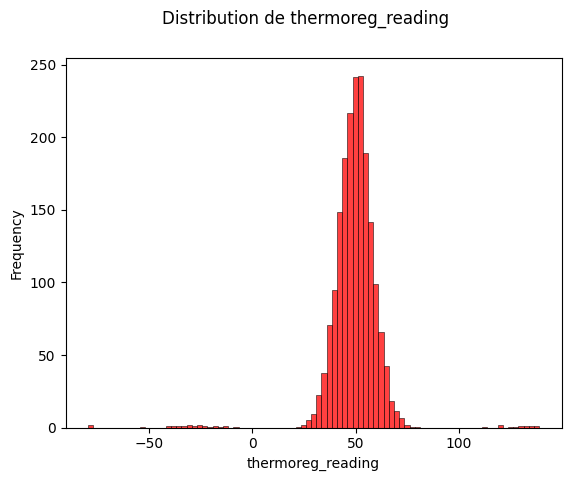

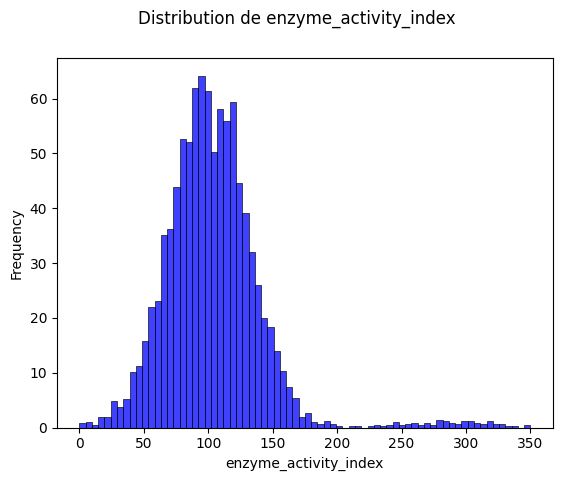

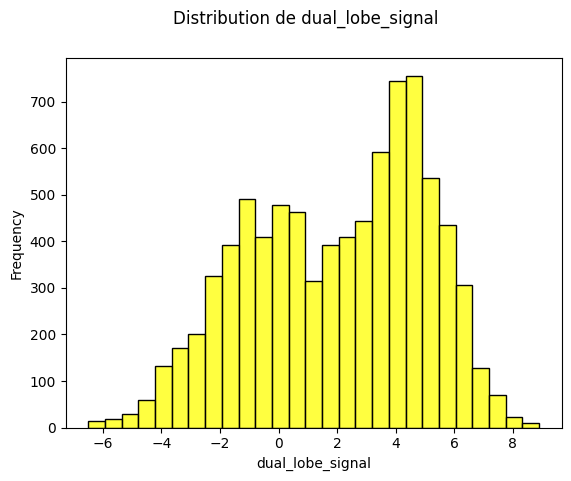

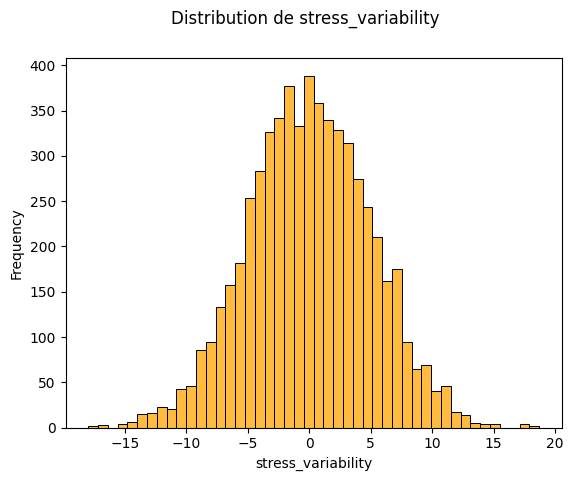

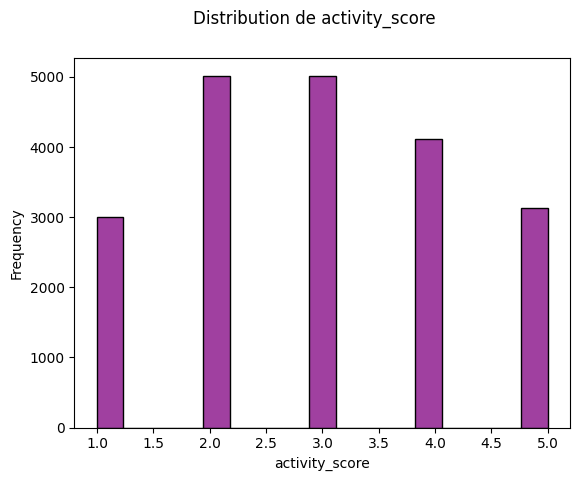

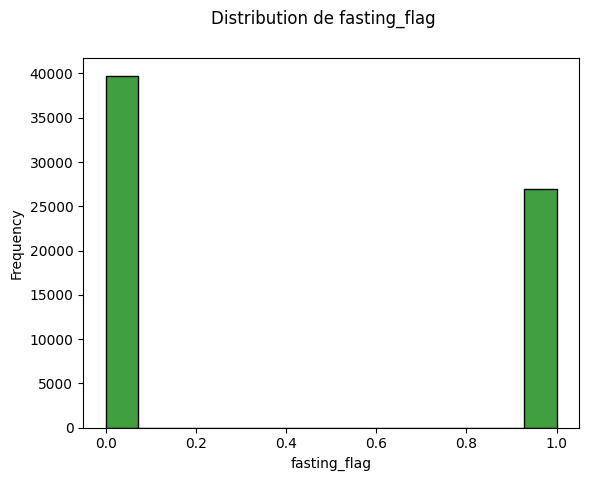

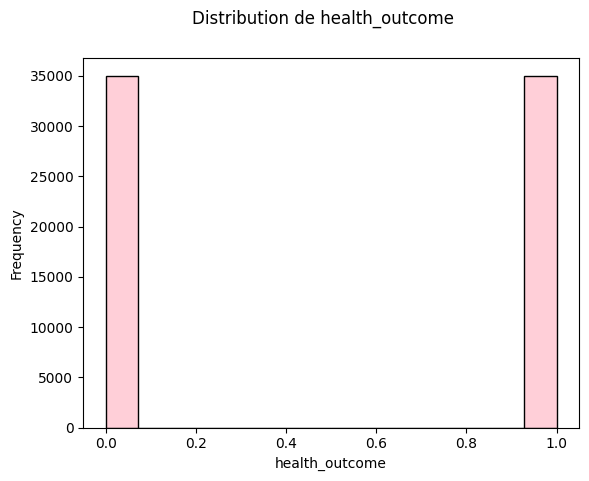

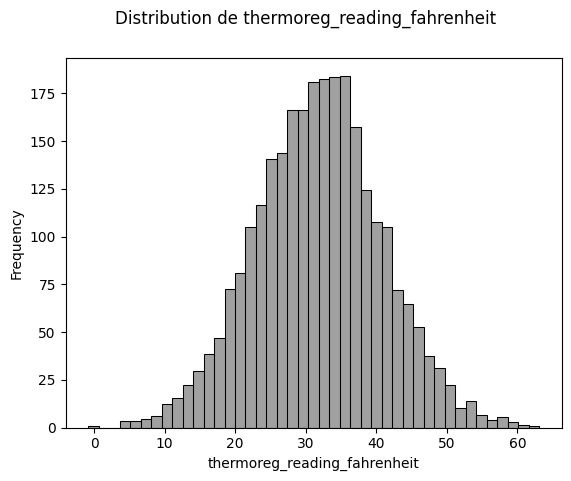

In [44]:
print("Caractérisation détaillée de la distribution des valeurs des attributs numériques\n")
print(new_copy_dataset.describe())
draw_histograms(new_copy_dataset)

**Réponse**

thermoreg_reading: distribution normale, unimodale, il y a des valeurs aberrantes quand le thermoreg_reading < 0 ou > 100.

enzyme_activity_index: distribution asymétrique multimodale car on voit deux sommets (l'un aux alentours de 65 et l'autre aux alentours de 58). Il y a des valeurs aberrantes quand la valeur de enzyme_activity_index > 200 ou < 12.5.

dual_lobe_signal: distribution asymétrique multimodale avec deux sommets, le premier aux alentours de 490 et l'autre aux alentours de 750, il n'y a pas de valeurs aberrantes significatives.

stress_variability: distribution normale unimodale, il y a quelques valeurs aberrantes quand la valeur de l'attribut > 15 ou < -15.

activity_score: distribution asymétrique multimodale avec deux sommets tous les deux proches de 5000 comme fréquence, il n'y pas de valeurs aberrantes significatives.

fasting_flag: distribution asymétrique multimodale, il n'y a pas de valeurs aberrantes.

health_outcome: distribution asymétrique multimodale, il n'y a pas de valeurs aberrantes.

thermoreg_reading_fahrenheit: distribution normale unimodale,il y a des valeurs aberrantes aux alentours de 0 et quand la valeur de l'attribut est > 60.

6. **Équilibre des classes**

- Rapporter les proportions cibles ; inclure un simple diagramme à barres.

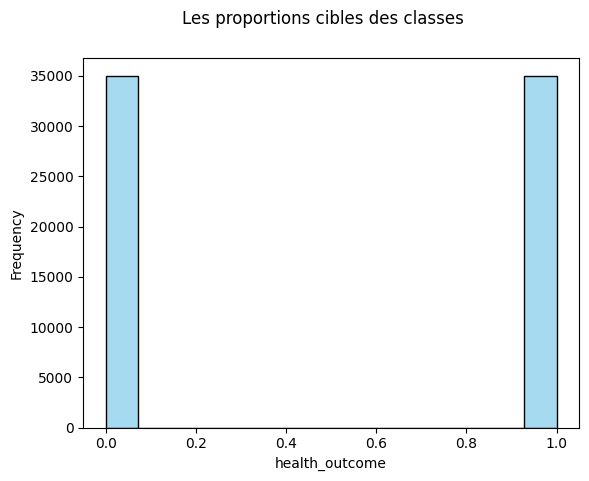

In [45]:
plt.figure()
sns.histplot(new_copy_dataset['health_outcome'],color='skyblue', stat="frequency")
plt.suptitle("Les proportions cibles des classes")
plt.show()

# Les deux classes ont exactement la même proportionnalité

7. **Sauvegarder les données nettoyées**

- Conserver les attributs principaux plus `health_outcome`.
- Assurer les types de données corrects (numérique/ordinal/binaire).
- Sauvegarder sous `alien_pet_health_cleaned.csv`.

In [46]:
# Cellule de code

print(new_copy_dataset.dtypes)

new_copy_dataset.to_csv('alien_pet_health_cleaned.csv')

# Les types sont comme attendus

thermoreg_reading               float64
enzyme_activity_index           float64
dual_lobe_signal                float64
stress_variability              float64
habitat_zone                     object
activity_score                  float64
fasting_flag                    float64
health_outcome                    int64
thermoreg_reading_fahrenheit    float64
dtype: object


# Références

https://opensourceoptions.com/8-ways-to-create-initialize-pandas-data-frames/

https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.copy.html

https://stackoverflow.com/questions/34794067/how-to-set-a-cell-to-nan-in-a-pandas-dataframe

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html#pandas.unique

https://seaborn.pydata.org/generated/seaborn.histplot.html

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html





# Ressources

Si vous utilisez l'assistance par IA, il est essentiel de documenter minutieusement toutes les interactions. Votre rapport doit spécifier les outils et leurs versions, accompagnés d'une transcription complète de ces interactions. La plupart des plateformes d'IA enregistrent automatiquement les conversations, il est donc conseillé de démarrer une nouvelle conversation spécifiquement pour le devoir et d'utiliser systématiquement ce fil tout au long de votre travail. Assurez-vous que cette conversation reste exclusivement centrée sur le devoir. Incluez la transcription de cette conversation.